# Task 5 -- Sales Prediction Using Python

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
sales = pd.read_csv("C:\\Users\\siddu\\OneDrive\\Documents\\oasis\\sales.zip")
sales.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


# preliminary Data Inspection

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
sales.isna().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [5]:
sales.nunique()

Unnamed: 0    200
TV            190
Radio         167
Newspaper     172
Sales         121
dtype: int64

In [6]:
sales.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [7]:
sales.groupby('Sales').mean()

,Unnamed: 0,TV,Radio,Newspaper
Sales,,,,
1.6,131.000000,0.70,39.600000,8.7
3.2,156.000000,4.10,11.600000,5.7
4.8,9.000000,8.60,2.100000,1.0
5.3,94.000000,9.25,15.150000,17.5
5.5,57.000000,7.30,28.100000,41.4
...,...,...,...,...
24.7,129.000000,220.30,49.000000,3.2
25.4,94.666667,266.60,45.033333,33.5
25.5,199.000000,283.60,42.000000,66.2


In [8]:
sales['Sales'].value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: Sales, Length: 121, dtype: int64

# Preparing the test and train data

In [9]:
x = sales.drop(columns = ['Sales'],axis = 1)
y = sales['Sales']

In [10]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3)

# Modelling and Predicting the data

In [11]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
r1 = r2_score(y_test,y_pred)*100
print("r2_score by linear regression :",r1)


r2_score by linear regression : 88.89888525364093


# Visualising the Sales

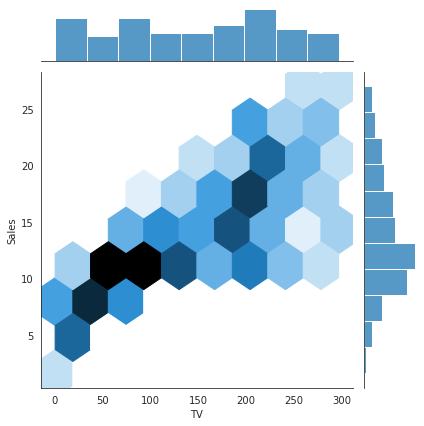

In [12]:
with sns.axes_style('white'):
    sns.jointplot(x='TV',y='Sales',data= sales,kind='hex')
    


C:\Users\siddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


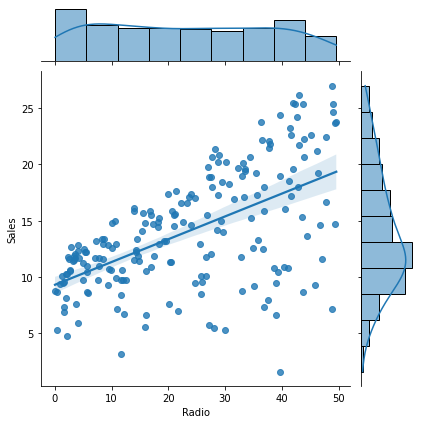

In [13]:
sns.jointplot("Radio", "Sales", data=sales, kind='reg');

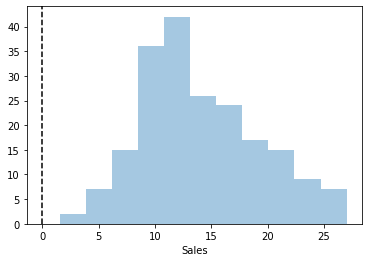

In [62]:
sns.distplot(sales['Sales'], kde=False);
plt.axvline(0, color="k", linestyle="--");